In [19]:
# Clears all user-defined variables, functions, and imports without asking for confirmation.
%reset -f

In [1]:
import numpy as np
import pandas as pd

Represent time series as `np array`.

In [3]:
q = np.array([1,1,1,2,2,3,3,4]) #|q|=m=8
c = np.array([1,1,1,1,2,3,3,3,4,4,5,6,7]) #|c|=n=13
# l = 2
# k ranges from m/l = 8/2 = 4 to min(lm,n) = min(2*8,13) = 13 (i.e, k = 4..13)
# L = 13

In [4]:
len(q), len(c) # lengths

(8, 13)

A prefix of $C$ with length = 10

In [5]:
c_0_10 = c[0:10] # The first entry is included, the last entry is excluded
c_0_10

array([1, 1, 1, 1, 2, 3, 3, 3, 4, 4])

In [6]:
type(c_0_10)

numpy.ndarray

Another example

In [7]:
# Data from https://jmotif.github.io/sax-vsm_site/morea/algorithm/znorm.html
q = pd.Series(np.array([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34]))
c = pd.Series(np.array([-0.12, -0.16, -0.13,  0.28,  0.37,  0.39,  0.18,  0.09,  0.15, -0.06,  0.06, -0.07, -0.13, -0.18, -0.26]))

In [26]:
type(q)

pandas.core.series.Series

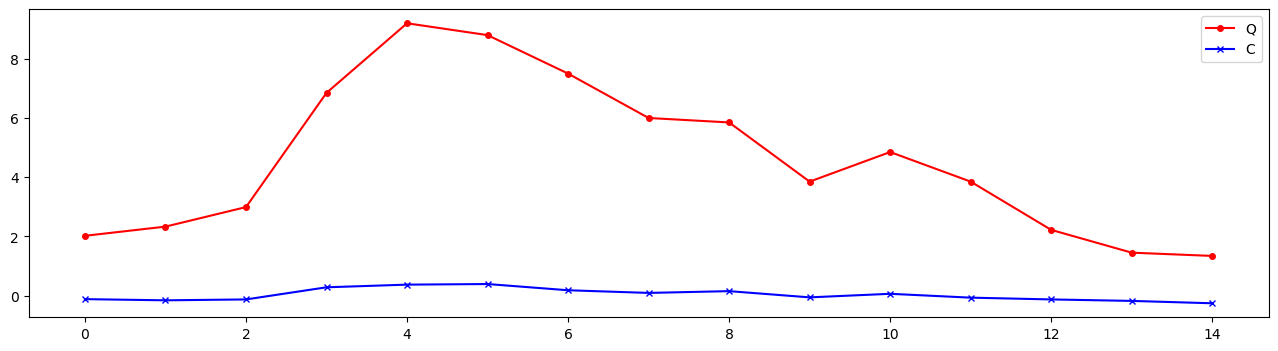

In [27]:
from sktime.utils.plotting import plot_series
fig, ax = plot_series(q, c, markers=["o", "x"], colors=["red", "blue"], labels=["Q", "C"]) 


# Some time series examples from library.


## sktime

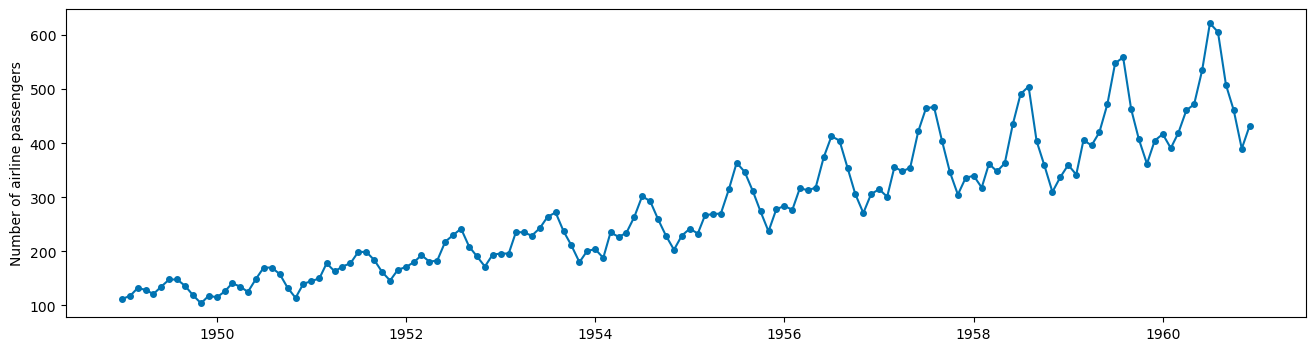

In [28]:
# https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.utils.plotting.plot_series.html
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
ts = load_airline()
fig, ax = plot_series(ts)  

In [29]:
type(ts)

pandas.core.series.Series

## tslearn

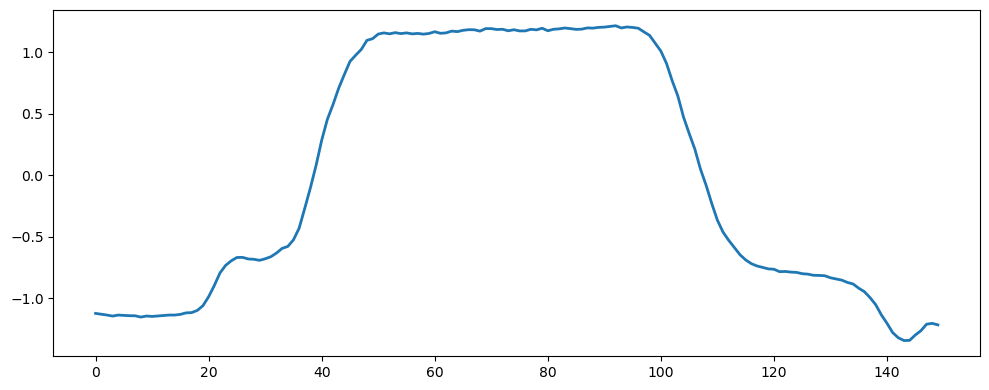

In [30]:
from tslearn.datasets import UCR_UEA_datasets
import matplotlib.pyplot as plt

# Load dataset
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")
X_train = X_train.squeeze()
X_test = X_test.squeeze()
ts = X_test[0].squeeze()
# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(ts, label="X_test[0]", linewidth=2)
# plt.title("Time Series: X_test[0]")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.grid(True)
# plt.legend()
plt.tight_layout()
plt.show()

In [31]:
type(ts)

numpy.ndarray

#  Z-normalization

A simple Z-normalization function

In [33]:
def normalize(ts):
    mean = np.mean(ts)
    std = np.std(ts)
    return (ts - mean) / std

In [34]:
def normalize2(series):
    mean = series.mean()  # Calculate the mean
    std = series.std(ddof=0) # Calculate the population standard deviation instead of the default sample standard deviation
    
    # Apply z-normalization formula: (x - mean) / std
    normalized_series = (series - mean) / std
    
    return normalized_series

Standard Z-normalizer from library

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def normalize3(series):
    # Reshape the series to 2D (required by StandardScaler)
    reshaped = series.values.reshape(-1, 1)
    
    # Apply z-normalization
    scaler = StandardScaler()
    normalized = scaler.fit_transform(reshaped)
    
    # Convert back to pandas Series
    return pd.Series(normalized.flatten(), index=series.index)

z_normalize only works for `series` but not `np array`.

In [37]:
q_znorm = normalize(q)
c_znorm = normalize(c)

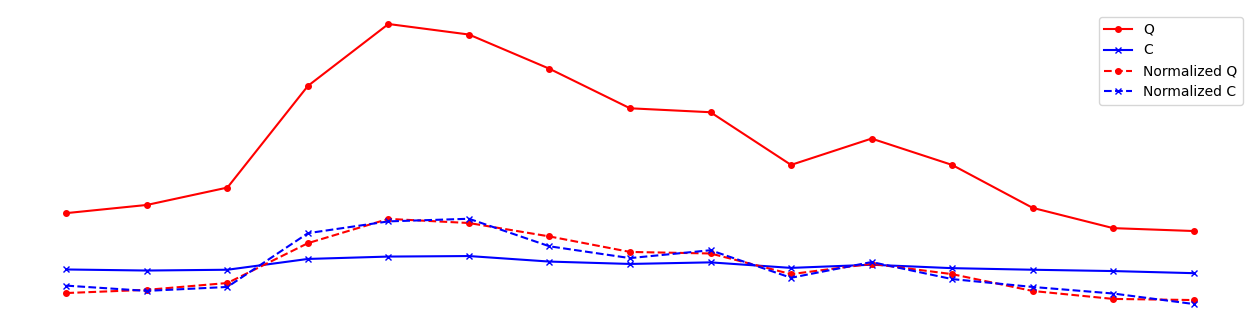

In [38]:
import matplotlib.pyplot as plt
fig, ax = plot_series(q, c, q_znorm, c_znorm, markers=["o", "x", "o", "x"], colors=["red", "blue", "red", "blue"], labels=["Q", "C", "Normalized Q", "Normalized C"]) 
ax.lines[2].set_linestyle("--")  # Dashed line for the first series
ax.lines[3].set_linestyle(("--"))   # Dotted line for the second series
# https://stackoverflow.com/questions/51054529/manipulate-linestyle-in-matplotlib-legend
plt.axis('off')
ax.legend()
plt.savefig("../figures/normalization.pdf", format="pdf", bbox_inches="tight")
plt.show()

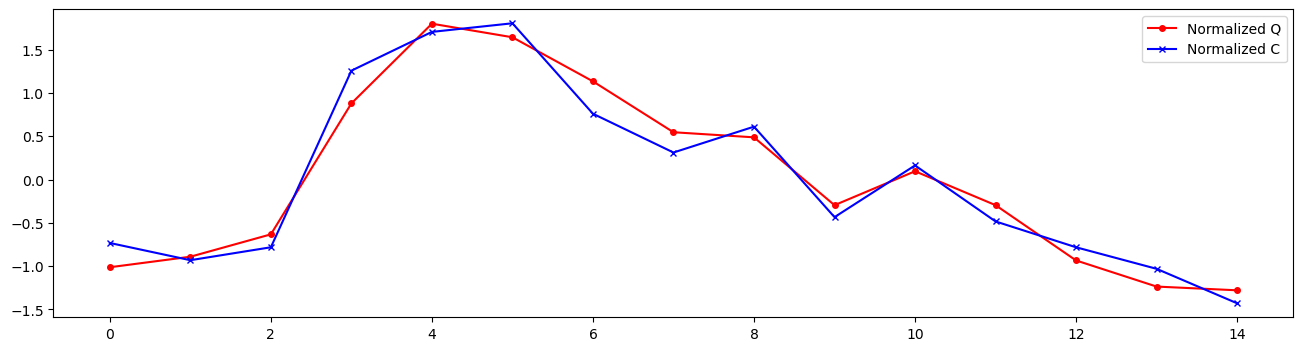

In [40]:
fig, ax = plot_series(q_znorm, c_znorm, markers=["o", "x"], colors=["red", "blue"], labels=["Normalized Q", "Normalized C"]) 
# https://stackoverflow.com/questions/51054529/manipulate-linestyle-in-matplotlib-legend
ax.legend()
plt.show()